**¿Qué es SQL?**

- SQL son las siglas de Structured Query Language
- SQL le permite acceder y manipular bases de datos
- SQL se convirtió en un estándar del American National Standards Institute (ANSI) en 1986 y de la Organización Internacional de Normalización (ISO) en 1987.

**¿Qué puede hacer SQL?**
- SQL puede ejecutar consultas en una base de datos
- SQL puede recuperar datos de una base de datos
- SQL puede insertar registros en una base de datos
- SQL puede actualizar registros en una base de datos
- SQL puede eliminar registros de una base de datos
- SQL puede crear nuevas bases de datos
- SQL puede crear nuevas tablas en una base de datos
- SQL puede crear procedimientos almacenados en una base de datos
- SQL puede crear vistas en una base de datos
- SQL puede establecer permisos en tablas, procedimientos y vistas


**¿Por qué SQL?**
- Como persona expertas en datos necesitas saber manipularlos desde la base de datos.
- Muchos empleos en datos requieren SQL como habilidad.


# Iniciemos practicando con una BD (Base de Datos) popular

La base de datos Northwind es utilizada en todo tipo de artículos, libros y cursos para ilustrar los conceptos básicos de trabajo con bases de datos.


#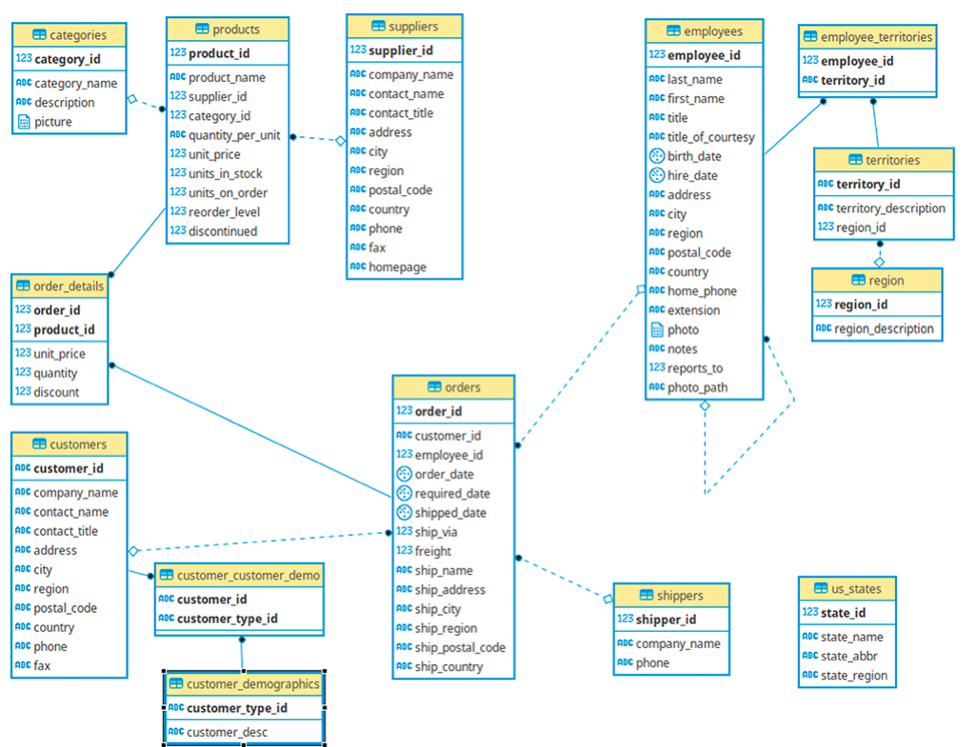

In [ ]:
import sqlite3

conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Ejecutar un script de SQL para crear la base de datos de la imagen de arriba. La BD Northwind
sql_file = open("Northwind.Sqlite3.sql",encoding='latin-1')
sql_as_string = sql_file.read()
cursor.executescript(sql_as_string)

In [ ]:
sql_instruction = '''SELECT COUNT(ProductID)
FROM Products;'''
cursor.execute(sql_instruction)

res = cursor.fetchall()
print(res)

[(77,)]


**RDBMS**

- RDBMS son las siglas de Relational Database Management System.

- RDBMS es la base de SQL y de todos los sistemas de bases de datos modernos como MS SQL Server, Big Query, IBM DB2, Oracle, MySQL y Microsoft Access.

- Los datos en RDBMS se almacenan en objetos de base de datos llamados tablas. Una tabla es una colección de entradas de datos relacionados y consta de columnas y filas.

**Tablas de base de datos**

- Una base de datos suele contener una o más tablas.
- Cada tabla se identifica con un nombre (por ejemplo, "Clientes" u "Pedidos").
- Las tablas contienen registros (filas) con datos.

#Empecemos a practicar con código

**La instrucción SQL SELECT**

- Se utiliza para seleccionar datos de una base de datos.

- Los datos devueltos se almacenan en una tabla de resultados, denominada conjunto de resultados.

SELECT Syntax
``` mysql
SELECT column1, column2, ...
FROM table_name;
```

In [ ]:
sql_instruction = ''' SELECT FirstName, city
FROM employees
'''
cursor.execute(sql_instruction)
res = cursor.fetchall()

for i in res:
  print(i)

('Nancy', 'Seattle')
('Andrew', 'Tacoma')
('Janet', 'Kirkland')
('Margaret', 'Redmond')
('Steven', 'London')
('Michael', 'London')
('Robert', 'London')
('Laura', 'Seattle')
('Anne', 'London')


In [ ]:
# Usar el caracter asterisco * para seleccionar TODAS las columnas
sql_instruction = ''' SELECT *
FROM employees
'''
cursor.execute(sql_instruction)
res = cursor.fetchall()

for i in res:
  print(i)

(1, 'Davolio', 'Nancy', 'Sales Representative', 'Ms.', '1948-12-08', '1992-05-01', '507 - 20th Ave. E.Apt. 2A', 'Seattle', 'WA', '98122', 'USA', '(206) 555-9857', '5467', b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00N\x00\x00\xff\xee\x00&Adobe\x00d\xc0\x00\x00\x00\x01\x03\x00\x15\x04\x03\x06\n\r\x00\x00\r\xc7\x00\x00\x14\xf8\x00\x00\x1f\xc7\x00\x000\x18\xff\xdb\x00\x84\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x03\x04\x03\x02\x03\x04\x05\x03\x03\x03\x03\x05\x05\x04\x04\x05\x04\x04\x05\x07\x05\x06\x06\x06\x06\x05\x07\x07\x08\x08\t\x08\x08\x07\x0b\x0b\x0c\x0c\x0b\x0b\x0c\x0c\x0c\x0c\x0c\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x01\x03\x03\x03\x05\x05\x05\n\x07\x07\n\x0f\x0c\n\x0c\x0f\x12\x0e\x0e\x0e\x0e\x12\x11\x0e\x0e\x0e\x0e\x0e\x11\x11\x0e\x0e\x0e\x0e\x0e\x0e\x11\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\xff\xc2\x00\x11\x08\x00\xaa\x00\xa0\x03\x01\x11\

**La instrucción SQL SELECT DISTINCT**
- Se usa para devolver solo valores distintos (diferentes).

- Dentro de una tabla, una columna a menudo contiene muchos valores duplicados; y, a veces, solo desea enumerar los valores diferentes (distintos).

SELECT DISTINCT Syntax
``` mysql
SELECT DISTINCT column1, column2, ...
FROM table_name;
```

In [ ]:
sql_instruction = '''SELECT DISTINCT city
FROM employees'''

cursor.execute(sql_instruction)
res = cursor.fetchall()

for i in res:
  print(i)

('Seattle',)
('Tacoma',)
('Kirkland',)
('Redmond',)
('London',)


**Antes** convirtamos la tabla en un dataframe para poder ver los datos desde colab con una mejor visualizacion. 

In [ ]:
import pandas as pd

sql_instruction = '''SELECT *
FROM employees;'''
cursor.execute(sql_instruction)

tabla = cursor.fetchall()
nombres_columnas = cursor.execute('PRAGMA table_info("employees")').fetchall()  # Se obtienen los nombres de las columnas

df_employees = pd.DataFrame(tabla, columns=[i[1] for i in nombres_columnas])

df_employees.head(2)

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp


In [ ]:
nombres_columnas

[(0, 'EmployeeID', 'INTEGER', 0, None, 1),
 (1, 'LastName', 'TEXT', 0, None, 0),
 (2, 'FirstName', 'TEXT', 0, None, 0),
 (3, 'Title', 'TEXT', 0, None, 0),
 (4, 'TitleOfCourtesy', 'TEXT', 0, None, 0),
 (5, 'BirthDate', 'DATE', 0, None, 0),
 (6, 'HireDate', 'DATE', 0, None, 0),
 (7, 'Address', 'TEXT', 0, None, 0),
 (8, 'City', 'TEXT', 0, None, 0),
 (9, 'Region', 'TEXT', 0, None, 0),
 (10, 'PostalCode', 'TEXT', 0, None, 0),
 (11, 'Country', 'TEXT', 0, None, 0),
 (12, 'HomePhone', 'TEXT', 0, None, 0),
 (13, 'Extension', 'TEXT', 0, None, 0),
 (14, 'Photo', 'BLOB', 0, None, 0),
 (15, 'Notes', 'TEXT', 0, None, 0),
 (16, 'ReportsTo', 'INTEGER', 0, None, 0),
 (17, 'PhotoPath', 'TEXT', 0, None, 0)]

In [ ]:
lista = []
for i in nombres_columnas:
  lista.append(i[1])

# Más eficiente que la opcion de arriba
lista = [i[1] for i in nombres_columnas] #List comprehension

EmployeeID
LastName
FirstName
Title
TitleOfCourtesy
BirthDate
HireDate
Address
City
Region
PostalCode
Country
HomePhone
Extension
Photo
Notes
ReportsTo
PhotoPath


In [ ]:
lista2 = [nombres_columnas[0][1], nombres_columnas[1][1], nombres_columnas[2][1],nombres_columnas[3][1]]
print(lista2)

['EmployeeID', 'LastName', 'FirstName', 'Title']


In [ ]:
lista = [i[1] for i in nombres_columnas]
print(lista)

['EmployeeID', 'LastName', 'FirstName', 'Title', 'TitleOfCourtesy', 'BirthDate', 'HireDate', 'Address', 'City', 'Region', 'PostalCode', 'Country', 'HomePhone', 'Extension', 'Photo', 'Notes', 'ReportsTo', 'PhotoPath']


**La cláusula SQL WHERE** 

- Se utiliza para filtrar registros.

- Se utiliza para extraer solo aquellos registros que cumplen una condición específica.

WHERE Syntax
``` mysql
SELECT column1, column2, ...
FROM table_name
WHERE condition;
```

SELECT   => Qué queremos (qué valores de qué columna(s))

WHERE    => De dónde lo queremos (Qué tabla) 

FROM     => Qué condición queremos que se cumpla

In [ ]:
query = """SELECT firstname, TitleOfCourtesy
FROM employees    
WHERE city='London' """
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Steven', 'Mr.')
('Michael', 'Mr.')
('Robert', 'Mr.')
('Anne', 'Ms.')


**Los operadores SQL AND, OR y NOT**
- La cláusula WHERE se puede combinar con los operadores AND, OR y NOT.

- Los operadores AND y OR se utilizan para filtrar registros en función de más de una condición:

- El operador AND muestra un registro si todas las condiciones separadas por AND son VERDADERAS.
- El operador OR muestra un registro si alguna de las condiciones separadas por OR es VERDADERA.
- El operador NOT muestra un registro si la condición (es) NO es VERDADERA.

AND Syntax
``` mysql
SELECT column1, column2, ...
FROM table_name
WHERE condition1 AND condition2 AND condition3 ...;
```
OR Syntax
``` mysql
SELECT column1, column2, ...
FROM table_name
WHERE condition1 OR condition2 OR condition3 ...;
```
NOT Syntax
``` mysql
SELECT column1, column2, ...
FROM table_name
WHERE NOT condition;
```

In [ ]:
# Ejemplo con AND
query = """SELECT firstname, TitleOfCourtesy, city
FROM employees    
WHERE city='London' AND TitleOfCourtesy = 'Ms.'"""
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Anne', 'Ms.', 'London')


In [ ]:
# Ejemplo con OR
query = """SELECT firstname, TitleOfCourtesy, city
FROM employees    
WHERE city='London' OR TitleOfCourtesy = 'Dr.'"""
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Andrew', 'Dr.', 'Tacoma')
('Steven', 'Mr.', 'London')
('Michael', 'Mr.', 'London')
('Robert', 'Mr.', 'London')
('Anne', 'Ms.', 'London')


In [ ]:
# Ejemplo con NOT
query = """SELECT firstname, TitleOfCourtesy, city
FROM employees    
WHERE NOT city='London' """
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Nancy', 'Ms.', 'Seattle')
('Andrew', 'Dr.', 'Tacoma')
('Janet', 'Ms.', 'Kirkland')
('Margaret', 'Mrs.', 'Redmond')
('Laura', 'Ms.', 'Seattle')


**La palabra clave ORDER BY de SQL**
- Se utiliza para ordenar el conjunto de resultados en orden ascendente o descendente.

- La palabra clave ORDER BY ordena los registros en orden ascendente de forma predeterminada. Para ordenar los registros en orden descendente, use la palabra clave DESC.


ORDER BY Syntax
``` mysql
SELECT column1, column2, ...
FROM table_name
ORDER BY column1, column2, ... ASC|DESC;
```
Nota: Es preferible y más útil en la mayoría de las ocasiones seleccionar una columna que riga el ordenamiento.

In [ ]:
# Ejemplo con ASC
query = """SELECT EmployeeID, firstname, TitleOfCourtesy, city
FROM employees    
ORDER BY city ASC"""
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

(3, 'Janet', 'Ms.', 'Kirkland')
(5, 'Steven', 'Mr.', 'London')
(6, 'Michael', 'Mr.', 'London')
(7, 'Robert', 'Mr.', 'London')
(9, 'Anne', 'Ms.', 'London')
(4, 'Margaret', 'Mrs.', 'Redmond')
(1, 'Nancy', 'Ms.', 'Seattle')
(8, 'Laura', 'Ms.', 'Seattle')
(2, 'Andrew', 'Dr.', 'Tacoma')


**La instrucción SQL INSERT INTO**

- Se utiliza para insertar nuevos registros en una tabla.


Hay dos formas
``` mysql
INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);
```

``` mysql
INSERT INTO table_name
VALUES (value1, value2, value3, ...);
```

**Las instrucciones IS NULL y IS NOT NULL**
- Se usan para encontrar "valores" NULL o no NULL


IS NULL Syntax
``` mysql
SELECT column_names
FROM table_name
WHERE column_name IS NULL;
```

IS NOT NULL Syntax
``` mysql
SELECT column_names
FROM table_name
WHERE column_name IS NOT NULL;
```

In [ ]:
# Ejemplo con IS NULL
query = """SELECT firstname, TitleOfCourtesy, city, Region
FROM employees    
WHERE Region IS NULL"""
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

In [ ]:
# Ejemplo con IS NULL
query = """SELECT firstname, TitleOfCourtesy, city, Region
FROM employees    
WHERE Region IS NOT NULL"""
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Nancy', 'Ms.', 'Seattle', 'WA')
('Andrew', 'Dr.', 'Tacoma', 'WA')
('Janet', 'Ms.', 'Kirkland', 'WA')
('Margaret', 'Mrs.', 'Redmond', 'WA')
('Steven', 'Mr.', 'London', 'East')
('Michael', 'Mr.', 'London', 'East')
('Robert', 'Mr.', 'London', 'East')
('Laura', 'Ms.', 'Seattle', 'WA')
('Anne', 'Ms.', 'London', 'East')


**La declaración SQL UPDATE**
- Se usa para modificar los registros existentes en una tabla.

UPDATE Syntax
``` mysql
UPDATE table_name
SET column1 = value1, column2 = value2, ...
WHERE condition;
```
**Nota:** ¡Ten cuidado al actualizar registros en una tabla! Observa la cláusula WHERE en la instrucción UPDATE. La cláusula WHERE especifica qué registros deben actualizarse. Si omites la cláusula WHERE, se actualizarán *todos* los registros de la tabla.

In [ ]:
query = """UPDATE employees
        SET Region = "East"
        WHERE Region IS NULL"""
cursor.execute(query)

**La declaración SQL DELETE**
- Se utiliza para eliminar registros existentes en una tabla.

Sintaxis DELETE
``` mysql
DELETE FROM table_name WHERE condition;
```

**Nota:** ¡Ten cuidado al eliminar registros en una tabla! Observa la cláusula WHERE en la instrucción DELETE. La cláusula WHERE especifica qué registros deben eliminarse. Si omitea la cláusula WHERE, se eliminarán todos los registros de la tabla.

In [ ]:
# Ejecuta esta instrucción. DELETE FROM Customers WHERE CustomerName='Alfreds Futterkiste';

**Eliminar todos los registros**
- Es posible eliminar todas las filas de una tabla sin eliminar la tabla. Esto significa que la estructura de la tabla, los atributos y los índices estarán intactos:

``` mysql
DELETE FROM table_name;
```

In [ ]:
# Haz la prueba con esta instrucción: DELETE FROM Customers;

**La cláusula SQL SELECT TOP**
- Se utiliza para especificar el número de registros a devolver.
- La cláusula SELECT TOP es útil en tablas grandes con miles de registros. Devolver una gran cantidad de registros puede afectar el rendimiento.

Esta es la sintaxis para SQL Server
``` mysql
SELECT TOP number|percent column_name(s)
FROM table_name
WHERE condition;
```

**Analogía**

import pandas as pd

df = pd.read_csv(~)

df.head(5)

In [ ]:
# PARA SQL Server/MS Access
# ************ Ejemplo 1
# SELECT TOP 3 * FROM Customers;

# ************ Ejemplo 2
# SELECT TOP 50 PERCENT * FROM Customers;

# -------------------------------------------
# PARA MySQL
# ************ Ejemplo 1
# SELECT * FROM Customers
# LIMIT 3;

# ************ Ejemplo 2
# SELECT * FROM Customers
# WHERE Country='Germany'
# LIMIT 3;

# -------------------------------------------
# PARA Oracle
# ************ Ejemplo 1
# SELECT * FROM Customers
# FETCH FIRST 3 ROWS ONLY;

# ************ Ejemplo 2
# SELECT * FROM Customers
# FETCH FIRST 50 PERCENT ROWS ONLY;

# -------------------------------------------
# Pruébalas con SQLite. Investiga cómo replicar el resultado usando SQLite

**Nota:** No todos los sistemas de bases de datos admiten la cláusula SELECT TOP. MySQL admite la cláusula LIMIT para seleccionar un número limitado de registros, mientras que Oracle usa FETCH FIRST n ROWS ONLY y ROWNUM.

MIN() Syntax
``` mysql
SELECT MIN(column_name)
FROM table_name
WHERE condition;
```
MAX() Syntax
``` mysql
SELECT MAX(column_name)
FROM table_name
WHERE condition;
```

In [ ]:
# Ejemplo con MAX - NOTA: LA FUNCIÓN TIENE SENTIDO CON DATOS NUMÉRICOS
query = """SELECT MAX(firstname)
FROM employees"""
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Steven',)


In [ ]:
# Usemos otra tabla de la BD (Base de Datos) que sí contenga datos numéricos
query = """SELECT MIN(UnitPrice) AS SmallestPrice
FROM Products"""

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

(263.5,)


COUNT() Syntax
``` mysql
SELECT COUNT(column_name)
FROM table_name
WHERE condition;
```

AVG() Syntax
``` mysql
SELECT AVG(column_name)
FROM table_name
WHERE condition;
```

SUM() Syntax
``` mysql
SELECT SUM(column_name)
FROM table_name
WHERE condition;
```

In [ ]:
# Ejemplo con AVG - NOTA: LA FUNCIÓN TIENE SENTIDO CON DATOS NUMÉRICOS
query = """SELECT AVG(firstname)
FROM employees"""
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

(0.0,)


In [ ]:
# Usemos otra tabla de la BD (Base de Datos) que sí contenga datos numéricos
query = """SELECT AVG(UnitPrice)
FROM Products"""

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

(28.866363636363637,)


Like y wildcards

IN Syntax
``` mysql
SELECT column_name(s)
FROM table_name
WHERE column_name IN (value1, value2, ...);
```

In [ ]:
query = """SELECT city, firstname
        FROM employees
        WHERE city IN ("London","Kirkland")"""
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Kirkland', 'Janet')
('London', 'Steven')
('London', 'Michael')
('London', 'Robert')
('London', 'Anne')


In [ ]:
query = """SELECT city, firstname
        FROM employees
        WHERE city ="London" OR city='Kirkland' """
cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Kirkland', 'Janet')
('London', 'Steven')
('London', 'Michael')
('London', 'Robert')
('London', 'Anne')


In [ ]:
# Recordar que una función debe hacer una sola cosa.
def consultar(cursor, query):
  cursor.execute(query)
  res = cursor.fetchall()
  for i in res:
    print(i)

In [ ]:
query = """SELECT city, firstname
        FROM employees
        WHERE city ="London" OR city='Kirkland' """

consultar(cursor, query)

('Kirkland', 'Janet')
('London', 'Steven')
('London', 'Michael')
('London', 'Robert')
('London', 'Anne')


BETWEEN Syntax
``` mysql
SELECT column_name(s)
FROM table_name
WHERE column_name BETWEEN value1 AND value2;
```

In [ ]:
query = """SELECT UnitPrice, ProductName
           FROM Products
           WHERE UnitPrice BETWEEN 10 AND 20"""

consultar(cursor, query)

(18, 'Chai')
(19, 'Chang')
(10, 'Aniseed Syrup')
(15.5, 'Genen Shouyu')
(17.45, 'Pavlova')
(10, "Sir Rodney's Scones")
(14, 'NuNuCa Nuß-Nougat-Creme')
(12.5, 'Gorgonzola Telino')
(14, 'Sasquatch Ale')
(18, 'Steeleye Stout')
(19, 'Inlagd Sill')
(18, 'Chartreuse verte')
(18.4, 'Boston Crab Meat')
(14, 'Singaporean Hokkien Fried Mee')
(19.45, 'Gula Malacca')
(12, 'Spegesild')
(12.75, 'Chocolade')
(20, 'Maxilaku')
(16.25, 'Valkoinen suklaa')
(19.5, 'Ravioli Angelo')
(13.25, 'Escargots de Bourgogne')
(17, 'Louisiana Hot Spiced Okra')
(14, 'Laughing Lumberjack Lager')
(12.5, 'Scottish Longbreads')
(15, 'Outback Lager')
(15, 'Röd Kaviar')
(10, 'Longlife Tofu')
(18, 'Lakkalikööri')
(13, 'Original Frankfurter grüne Soße')


In [ ]:
query = """SELECT UnitPrice, ProductName
           FROM Products
           WHERE UnitPrice NOT BETWEEN 10 AND 20"""

consultar(cursor, query)

**Alias (Mote, apodo) en SQL**
- Se utilizan para dar un nombre temporal a una tabla, o una columna de una tabla.
- Los alias se utilizan a menudo para hacer que los nombres de las columnas sean más legibles.
- Un alias solo existe mientras dura esa consulta.
- Se crea un alias con la palabra clave AS.


Sintaxis Alias para columnas
``` mysql
SELECT column_name AS alias_name
FROM table_name;
```

Sintaxis Alias para tablas
``` mysql
SELECT column_name(s)
FROM table_name AS alias_name;
```

In [ ]:
# Uso práctico de usar un Alias. Corregir.
query = """SELECT MIN(UnitPrice) AS SmallestPrice
           FROM Products;

           SELECT UnitPrice, ProductName
           FROM Products
           WHERE UnitPrice > SmallestPrice """

cursor.executescript(query)
res = cursor.fetchall()

for i in res:
  print(i)

OperationalError: ignored

In [ ]:
query = """SELECT CustomerID AS ID, ContactName AS Customer
FROM Customers; """

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

**Prueba las siguientes instrucciones:**
1. ``` mysql
SELECT CustomerName AS Customer, ContactName AS [Contact Person]
FROM Customers;
```

2. 
``` mysql
SELECT CustomerName, Address + ', ' + PostalCode + ' ' + City + ', ' + Country AS Address
FROM Customers;
```

TIP: Si tienes un error, asegúrate de que los nombres de las columnas sean correctos.

**🚨 IMPORTANTE 🚨**

**SQL JOIN**

Una cláusula JOIN se utiliza para combinar filas de dos o más tablas, según una columna relacionada entre ellas.

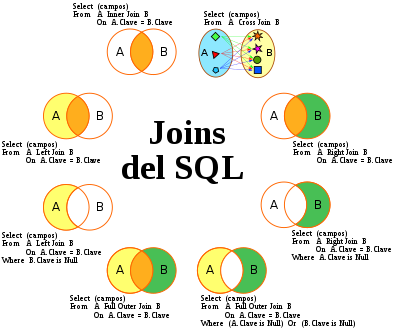

Palabra clave SQL INNER JOIN
-  INNER JOIN selecciona registros que tienen valores coincidentes en ambas tablas.

**INNER JOIN Syntax**
``` mysql
SELECT column_name(s)
FROM table1
INNER JOIN table2
ON table1.column_name = table2.column_name;
```

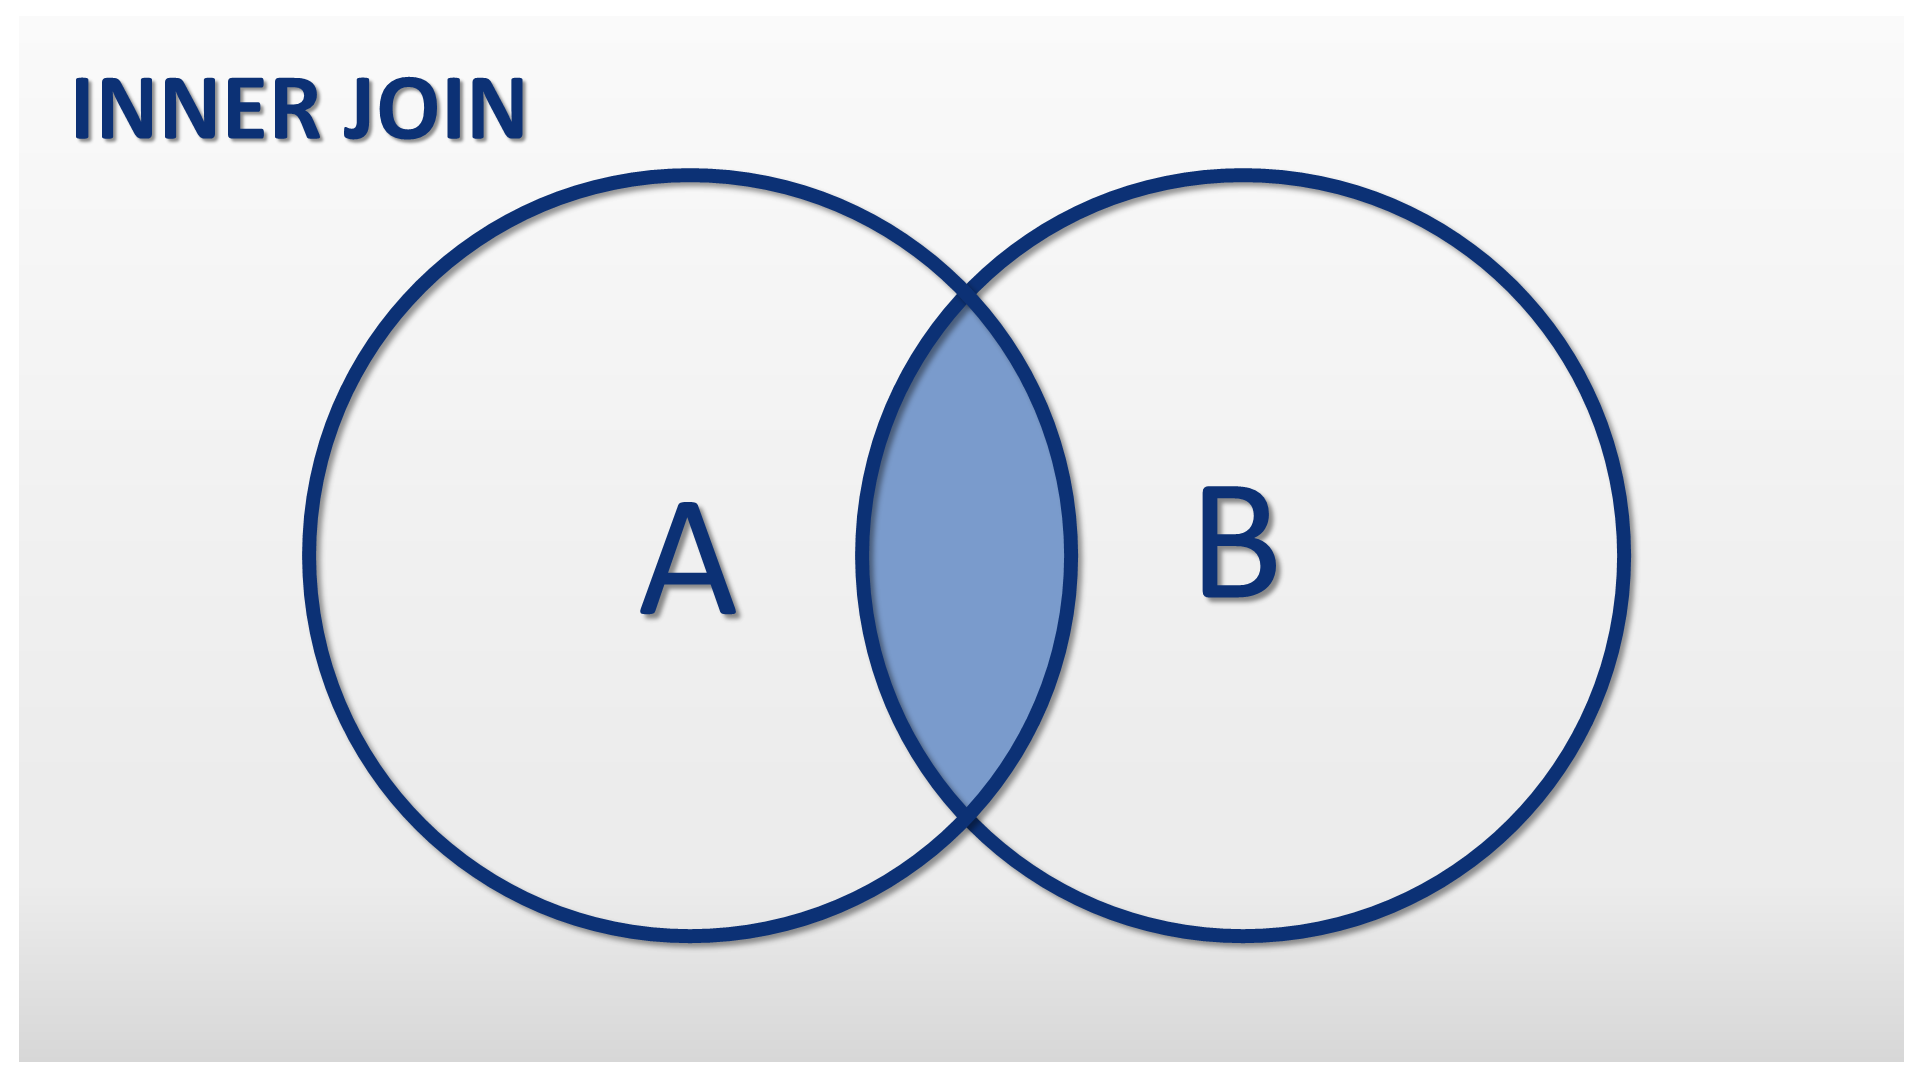

**Palabra clave SQL LEFT JOIN**

- Devuelve todos los registros de la tabla izquierda (tabla1) y los registros coincidentes de la tabla derecha (tabla2). El resultado es 0 registros del lado derecho, si no hay coincidencia.

LEFT JOIN Syntax
``` mysql
SELECT column_name(s)
FROM table1
LEFT JOIN table2
ON table1.column_name = table2.column_name;
```


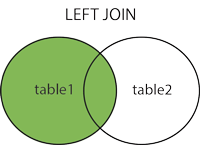

**Palabra clave SQL RIGHT JOIN**

- Devuelve todos los registros de la tabla derecha (tabla2) y los registros coincidentes de la tabla izquierda (tabla1). El resultado es 0 registros del lado izquierdo, si no hay coincidencia.

RIGHT JOIN Syntax
``` mysql
SELECT column_name(s)
FROM table1
RIGHT JOIN table2
ON table1.column_name = table2.column_name;
```

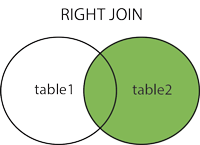

**Palabra clave SQL FULL OUTER JOIN**

- Devuelve todos los registros cuando hay una coincidencia en los registros de la tabla izquierda (tabla1) o derecha (tabla2).

Consejo: FULL OUTER JOIN y FULL JOIN son lo mismo.

FULL OUTER JOIN Syntax
``` mysql
SELECT column_name(s)
FROM table1
FULL OUTER JOIN table2
ON table1.column_name = table2.column_name
WHERE condition;
```

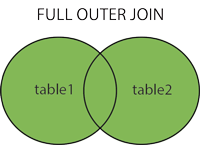

**SELF SQL**

- Una autocombinación es una combinación normal, pero la tabla se une a sí misma.


Self Join Syntax
``` mysql
SELECT column_name(s)
FROM table1 T1, table1 T2
WHERE condition;
```

**El operador SQL UNION**

- Se utiliza para combinar el conjunto de resultados de dos o más sentencias SELECT.

- Cada instrucción SELECT dentro de UNION debe tener el mismo número de columnas
- Las columnas también deben tener tipos de datos similares
- Las columnas de cada instrucción SELECT también deben estar en el mismo orden

UNION Syntax
``` mysql
SELECT column_name(s) FROM table1
UNION
SELECT column_name(s) FROM table2;
```

**La sentencia GROUP BY de SQL**

- Agrupa las filas que tienen los mismos valores en filas de resumen, como "encontrar el número de clientes en cada país".

- Se usa a menudo con funciones agregadas (COUNT (), MAX (), MIN (), SUM (), AVG ()) para agrupar el conjunto de resultados por una o más columnas.

GROUP BY Syntax
``` mysql
SELECT column_name(s)
FROM table_name
WHERE condition
GROUP BY column_name(s)
ORDER BY column_name(s);
```

**La cláusula HAVING de SQL**

- Se agregó a SQL porque la palabra clave WHERE no se puede usar con funciones agregadas.

HAVING Syntax
``` mysql
SELECT column_name(s)
FROM table_name
WHERE condition
GROUP BY column_name(s)
HAVING condition
ORDER BY column_name(s);
```

In [ ]:
query = """SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
HAVING COUNT(CustomerID) > 5; """

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

(9, 'Brazil')
(11, 'France')
(11, 'Germany')
(7, 'UK')
(13, 'USA')


**El operador SQL EXISTS**

- Se utiliza para probar la existencia de cualquier registro en una subconsulta.

- El operador EXISTS devuelve TRUE si la subconsulta devuelve uno o más registros.

EXISTS Syntax
``` mysql
SELECT column_name(s)
FROM table_name
WHERE EXISTS
(SELECT column_name FROM table_name WHERE condition);
```

**Los operadores SQL ANY y ALL**

- Te permiten realizar una comparación entre un valor de una sola columna y un rango de otros valores.

ANY Syntax
``` mysql
SELECT column_name(s)
FROM table_name
WHERE column_name operator ANY
  (SELECT column_name
  FROM table_name
  WHERE condition);
```


ALL Syntax With SELECT
``` mysql
SELECT ALL column_name(s)
FROM table_name
WHERE condition;
ALL Syntax With WHERE or HAVING
SELECT column_name(s)
FROM table_name
WHERE column_name operator ALL
  (SELECT column_name
  FROM table_name
  WHERE condition);
```

Nota: El operador debe ser un operador de comparación estándar (=, <>,! =,>,> =, <O <=).

**La instrucción SQL SELECT INTO**

- Copia datos de una tabla a una nueva tabla.

SELECT INTO Syntax
Copy all columns into a new table:

``` mysql
SELECT *
INTO newtable [IN externaldb]
FROM oldtable
WHERE condition;
```

Copy only some columns into a new table:
``` mysql
SELECT column1, column2, column3, ...
INTO newtable [IN externaldb]
FROM oldtable
WHERE condition;
```

**La instrucción SQL INSERT INTO SELECT**

- Copia los datos de una tabla y los inserta en otra tabla.

- La instrucción INSERT INTO SELECT requiere que los tipos de datos en las tablas de origen y destino coincidan.

- Nota: Los registros existentes en la tabla de destino no se ven afectados.

INSERT INTO SELECT Syntax
Copy all columns from one table to another table:
``` mysql
INSERT INTO table2
SELECT * FROM table1
WHERE condition;
```

Copy only some columns from one table into another table:
``` mysql
INSERT INTO table2 (column1, column2, column3, ...)
SELECT column1, column2, column3, ...
FROM table1
WHERE condition;
```

**La sentencia CASE de SQL**

- Devuelve un valor cuando se cumple la primera condición (como una instrucción if-then-else). Entonces, una vez que una condición es verdadera, dejará de leer y devolverá el resultado. Si no se cumple ninguna condición, devuelve el valor de la cláusula ELSE.

- Si no hay una parte ELSE y ninguna condición es verdadera, devuelve NULL.

CASE Syntax
``` mysql
CASE
    WHEN condition1 THEN result1
    WHEN condition2 THEN result2
    WHEN conditionN THEN resultN
    ELSE result
END;
```

**Comentarios de una sola línea**

- Los comentarios de una sola línea comienzan con -.

- Cualquier texto entre - y el final de la línea será ignorado (no se ejecutará).

Ejemplo
``` mysql
--Select all:
SELECT * FROM Customers;
```

Múltiples líneas
``` mysql
/*Select all the columns
of all the records
in the Customers table:*/
SELECT * FROM Customers;
```

**ALTER TABLE - ADD Column**

Para agregar una columna en una tabla, use la siguiente sintaxis:

``` mysql
ALTER TABLE table_name
ADD column_name datatype;
```


**ALTER TABLE - DROP COLUMN**

Para eliminar (drop) una columna de una tabla, utilice la siguiente sintaxis (observe que algunos sistemas de bases de datos no permiten eliminar una columna):

``` mysql
ALTER TABLE table_name
DROP COLUMN column_name;
```

**Restricciones de SQL**

- Las restricciones de SQL se utilizan para especificar reglas para los datos en una tabla.

- Las restricciones se pueden especificar cuando la tabla se crea con la instrucción CREATE TABLE, o después de que se crea la tabla con la instrucción ALTER TABLE.

Syntax
``` mysql
CREATE TABLE table_name (
    column1 datatype constraint,
    column2 datatype constraint,
    column3 datatype constraint,
    ....
);
```

**Las Restricciones y las Reglas de Negocio**

- Las Reglas del Negocio o Conjunto de Reglas de Negocio (Business Rules, por su descripción en inglés) describe las políticas, normas, operaciones, definiciones y restricciones presentes en una organización y que son de vital importancia para alcanzar los objetivos misionales.

- Ejemplos de reglas de negocio: "Un cliente al que facturamos más de 10.000 al año es un cliente de tipo A", "A los clientes de tipo A les aplicamos un descuento del 10% en pedidos superiores a 3.000".

[wikipedia](https://es.wikipedia.org/wiki/Reglas_de_negocio)

**¿Qué son las reglas de negocio en una base de datos?**
- Las reglas de negocio de restricción están dirigidas a especificar qué restricciones o condiciones deben cumplirse para que un dato se considere válido. Estas reglas, pueden tener una implementación en la base de datos

**Restricciones de SQL**

- Las restricciones de SQL se utilizan para especificar reglas para los datos en una tabla.

- Las restricciones se utilizan para limitar el tipo de datos que pueden incluirse en una tabla. Esto asegura la precisión y confiabilidad de los datos en la tabla. Si hay alguna violación entre la restricción y la acción de datos, la acción se cancela.

- Las restricciones pueden ser de nivel de columna o de tabla. Las restricciones de nivel de columna se aplican a una columna y las restricciones de nivel de tabla se aplican a toda la tabla.

Las siguientes restricciones se usan comúnmente en SQL:

- NOT NULL: garantiza que una columna no pueda tener un valor NULL
- UNIQUE: garantiza que todos los valores de una columna sean diferentes
- PRIMARY KEY: una combinación de NOT NULL y UNIQUE. Identifica de forma única cada fila en una tabla
- FOREIGN KEY: evita acciones que destruyan enlaces entre tablas
- CHECK: garantiza que los valores de una columna satisfagan una condición específica
DEFAULT: establece un valor predeterminado para una columna si no se especifica ningún valor
- CREATE INDEX: se utiliza para crear y recuperar datos de la base de datos muy rápidamente

In [ ]:
query = """CREATE TABLE EMPLOYEES(
           Name CHAR(50) NOT NULL,
           ID INTEGER NOT NULL
)
"""

**Tipos de datos de fecha SQL**

MySQL viene con los siguientes tipos de datos para almacenar una fecha o un valor de fecha / hora en la base de datos:

- DATE - format YYYY-MM-DD
- DATETIME - format: YYYY-MM-DD HH:MI:SS
- TIMESTAMP - format: YYYY-MM-DD HH:MI:SS
- YEAR - format YYYY or YY

OJO **SQL Server** viene con los siguientes tipos de datos para almacenar una fecha o un valor de fecha / hora en la base de datos:

- DATE - format YYYY-MM-DD
- DATETIME - format: YYYY-MM-DD HH:MI:SS
- SMALLDATETIME - format: YYYY-MM-DD HH:MI:SS
- TIMESTAMP - format: a unique number


Nota: ¡Los tipos de fecha se eligen para una columna cuando crea una nueva tabla en tu base de datos!

In [ ]:
query = """SELECT OrderID, CustomerID, OrderDate
FROM Orders
LIMIT 3"""

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

(10248, 'VINET', '1996-07-04 00:00:00.000')
(10249, 'TOMSP', '1996-07-05 00:00:00.000')
(10250, 'HANAR', '1996-07-08 00:00:00.000')


In [ ]:
query = """SELECT CustomerID, ContactName, Country
FROM Customers
LIMIT 3"""

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('ALFKI', 'Maria Anders', 'Germany')
('ANATR', 'Ana Trujillo', 'Mexico')
('ANTON', 'Antonio Moreno', 'Mexico')


**Orders**



> (10248, 'VINET', '1996-07-04 00:00:00.000')\
> (10249, 'TOMSP', '1996-07-05 00:00:00.000')\
> (10250, 'HANAR', '1996-07-08 00:00:00.000')


**Customers**

>('ALFKI', 'Maria Anders', 'Germany')\
('ANATR', 'Ana Trujillo', 'Mexico')\
('ANTON', 'Antonio Moreno', 'Mexico')



**Resultado esperado**

>(10248, 'Paul Henriot', '1996-07-04 00:00:00.000')\
(10249, 'Karin Josephs', '1996-07-05 00:00:00.000')\
(10250, 'Mario Pontes', '1996-07-08 00:00:00.000')


**INNER JOIN Syntax**
``` mysql
SELECT column_name(s)
FROM table1
INNER JOIN table2
ON table1.column_name = table2.column_name;
```

In [ ]:
query = """SELECT OrderID, ContactName, OrderDate
           FROM Orders
           INNER JOIN Customers
           ON Orders.CustomerID = Customers.CustomerID
           LIMIT 3
        """

consultar(cursor,query)

In [ ]:
query = """SELECT OrderID, ContactName, OrderDate
           FROM Orders
           LIMIT 3
        """

consultar(cursor,query)

In [ ]:
query = """SELECT Orders.OrderID, Customers.ContactName, Orders.OrderDate
FROM Orders
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID
LIMIT 3"""

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

(10248, 'Paul Henriot', '1996-07-04 00:00:00.000')
(10249, 'Karin Josephs', '1996-07-05 00:00:00.000')
(10250, 'Mario Pontes', '1996-07-08 00:00:00.000')


In [ ]:
query = """SELECT Customers.ContactName, Orders.OrderID
FROM Customers
LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
ORDER BY Customers.ContactName
LIMIT 3"""

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

('Alejandra Camino', 10281)
('Alejandra Camino', 10282)
('Alejandra Camino', 10306)


In [ ]:
query = """SELECT Orders.OrderID, Employees.LastName, Employees.FirstName
FROM Orders
RIGHT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
ORDER BY Orders.OrderID
LIMIT 3"""

cursor.execute(query)
res = cursor.fetchall()

for i in res:
  print(i)

OperationalError: ignored